In [1]:
import pandas as pd
import requests
import lxml
from bs4 import BeautifulSoup

import urllib
import random

import numpy as np
import matplotlib.pyplot as plt
import cv2
from wordcloud import WordCloud
import re

## Preparing data

In [2]:
def delete_extra_names(name):
    try: 
        return name[:[match.start() for match in re.finditer ('[А-Я]', name) ][1]]
    except:
        return name

In [3]:
female_names = pd.read_html('https://uk.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_' + 
                            '%D1%83%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%81%D1%8C%D0%BA%D0%B8%D1%85_' + 
                            '%D0%B6%D1%96%D0%BD%D0%BE%D1%87%D0%B8%D1%85_%D1%96%D0%BC%D0%B5%D0%BD')[1:-3] 
female_names = [df[1:] for df in female_names]
female_names = pd.concat(female_names, axis=0, ignore_index=True)[0].dropna()
female_names = [delete_extra_names(name) for name in female_names]
random.shuffle(female_names)
female_names = ' '.join(female_names).replace(',', '')

In [4]:
req = requests.get('https://uk.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%83%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%81%D1%8C%D0%BA%D0%B8%D1%85_%D1%87%D0%BE%D0%BB%D0%BE%D0%B2%D1%96%D1%87%D0%B8%D1%85_%D1%96%D0%BC%D0%B5%D0%BD')
soup = BeautifulSoup(req.text, 'lxml')
male_names = soup.find_all('li')[29:-210]
male_names = [delete_extra_names(el.get_text()) for el in male_names]
random.shuffle(male_names)
male_names = ' '.join(male_names).replace(',', '')

## Visualization

(-0.5, 1899.5, 1899.5, -0.5)

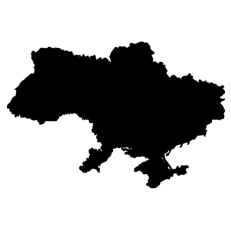

In [5]:
with urllib.request.urlopen('https://i.imgur.com/nY3pUfe.png') as resp:
    mask = np.asarray(bytearray(resp.read()), dtype="uint8")
    mask = cv2.imdecode(mask, cv2.IMREAD_COLOR)
plt.imshow(mask)
plt.axis('off')

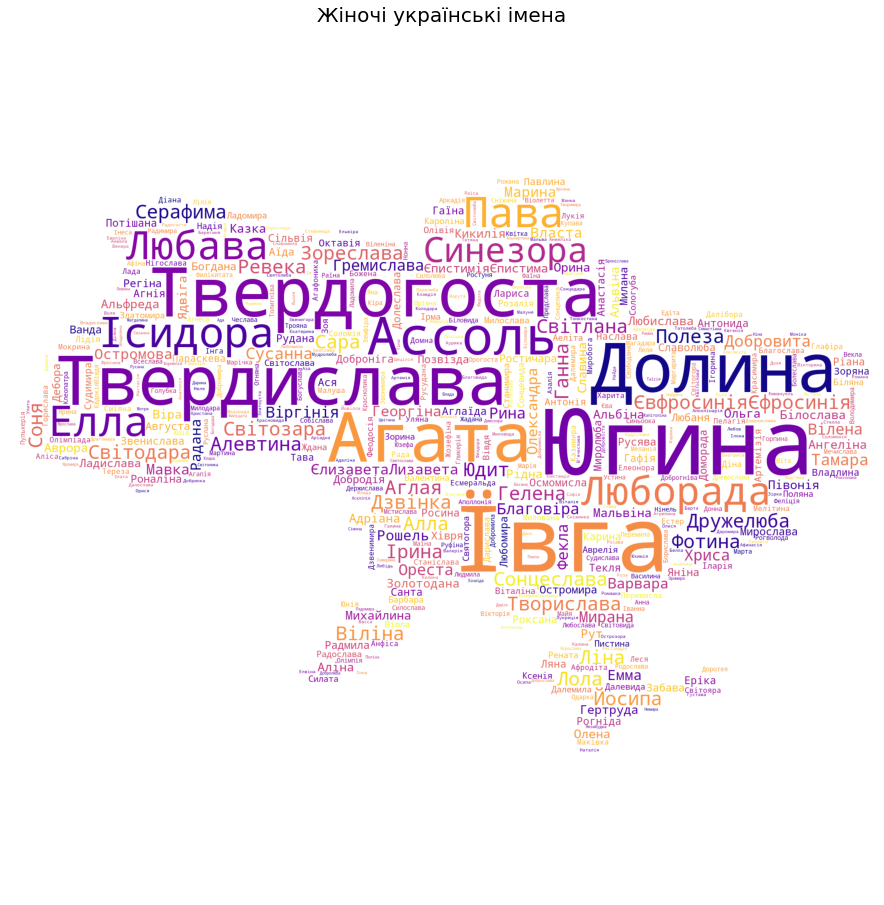

In [6]:
wordcloud = WordCloud(
    background_color="white", 
    mask=mask,
    max_words=1000,
    colormap = 'plasma',
).generate(female_names)


plt.figure(figsize=(16, 16))
plt.title('Жіночі українські імена', fontsize=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

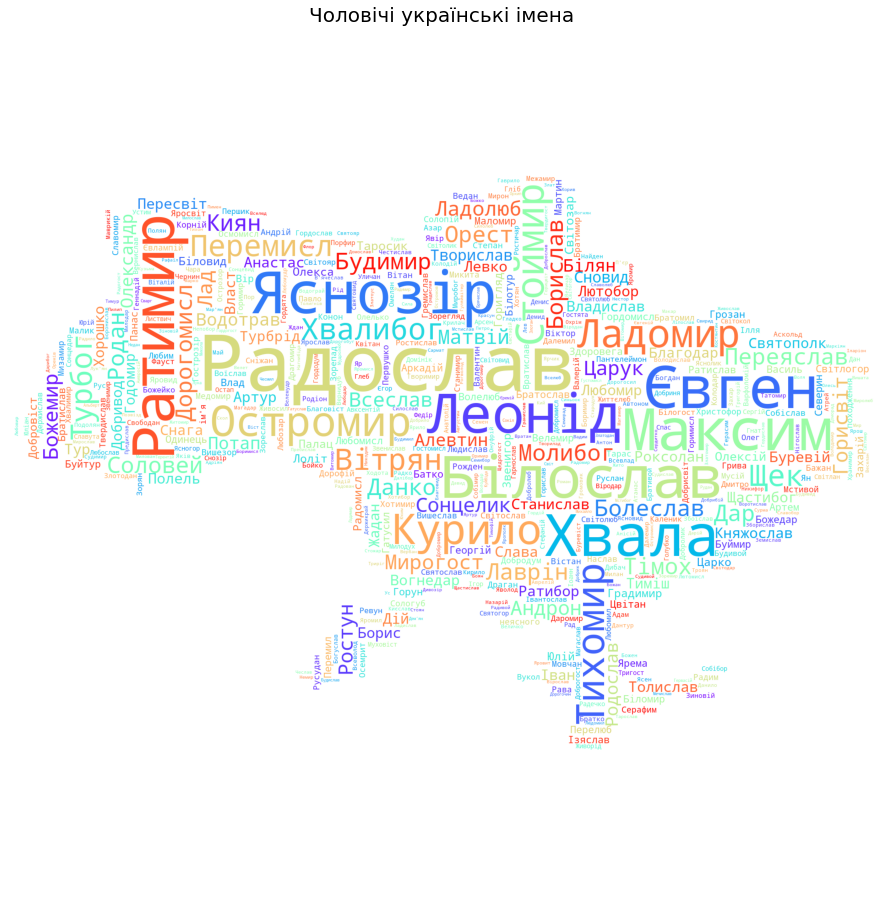

In [7]:
wordcloud = WordCloud(
    background_color="white", 
    mask=mask,
    max_words=1000,
    colormap = 'rainbow',
).generate(male_names)


plt.figure(figsize=(16, 16))
plt.title('Чоловічі українські імена', fontsize=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()